a- Implementar una segmentación para extraer objetos de un color específico usando umbrales en los canales RGB. 

In [279]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Dimensiones de la imagen: (472, 1280, 3)
Tipo de datos: uint8
Tamaño en memoria (bytes): 1812480


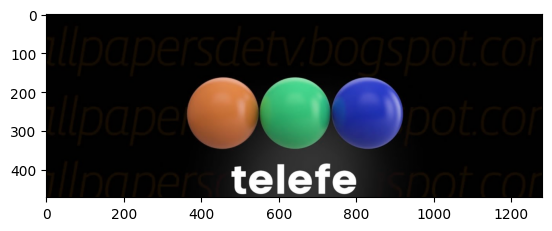

In [280]:
img_bgr = cv2.imread('telefe.jpg')

# Información básica de la imagen
print("Dimensiones de la imagen:", img_bgr.shape)
print("Tipo de datos:", img_bgr.dtype)
print("Tamaño en memoria (bytes):", img_bgr.nbytes)

# Visualización de la imagen completa
plt.imshow(img_bgr)

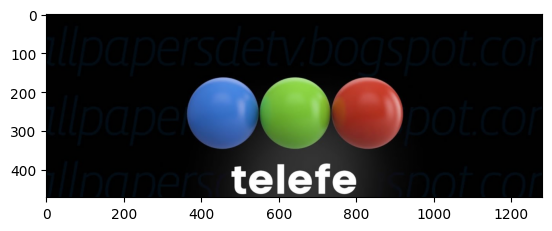

In [281]:
imagen_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(imagen_rgb)

Canal Azul (B)

In [282]:
canal_B = img_bgr[:,:,0]
print(f"Mínimo: {canal_B.min()}, Máximo: {canal_B.max()}, Promedio: {canal_B.mean():.2f}")

Mínimo: 0, Máximo: 255, Promedio: 24.56


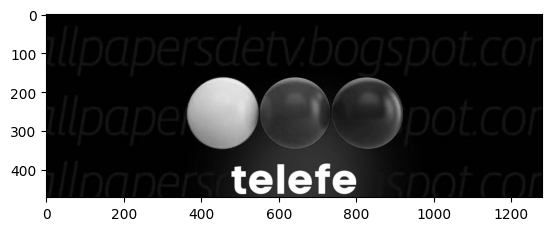

In [283]:
plt.imshow(canal_B, cmap='gray')

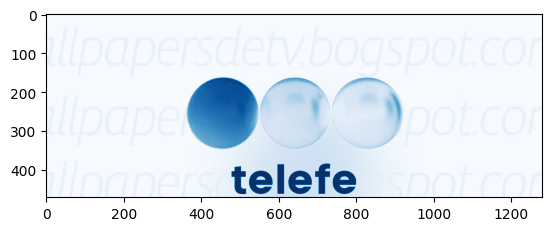

In [284]:
plt.imshow(canal_B, cmap='Blues')

Canal Verde (G)

In [285]:
canal_G = img_bgr[:,:,1]
print(f"Mínimo: {canal_G.min()}, Máximo: {canal_G.max()}, Promedio: {canal_G.mean():.2f}")

Mínimo: 0, Máximo: 255, Promedio: 25.68


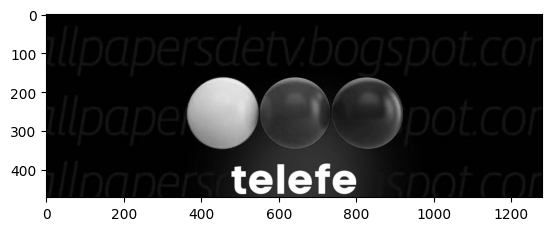

In [286]:
plt.imshow(canal_B, cmap='gray')

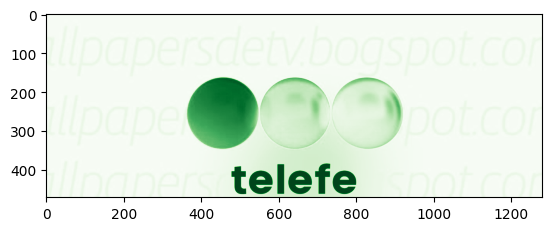

In [287]:
plt.imshow(canal_B, cmap='Greens')

Canal Rojo (R)

In [288]:
canal_R = img_bgr[:,:,2]
print(f"Mínimo: {canal_R.min()}, Máximo: {canal_R.max()}, Promedio: {canal_R.mean():.2f}")
#plt.imshow(canal_R, cmap='gray')

Mínimo: 0, Máximo: 255, Promedio: 24.69


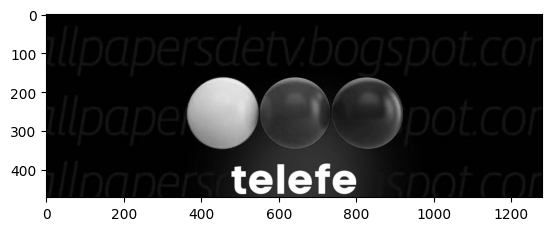

In [289]:
plt.imshow(canal_B, cmap='gray')

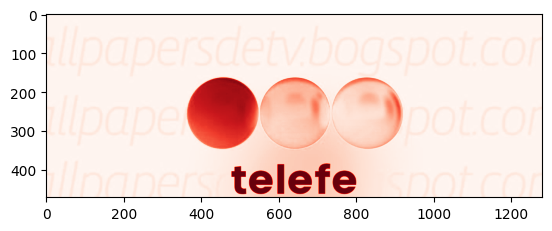

In [290]:
plt.imshow(canal_B, cmap='Reds')

b-Calcular y mostrar el histograma de la imagen en escala de grises. 

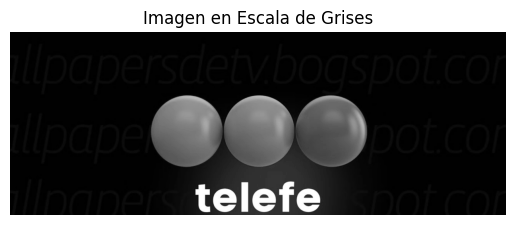

In [291]:
rojo = imagen_rgb[:, :, 0]
verde = imagen_rgb[:, :, 1]
azul = imagen_rgb[:, :, 2]

# Conversión a escala de grises
rojo_f = rojo.astype(float)
verde_f = verde.astype(float)
azul_f = azul.astype(float)

# Pesos para promedio ponderado
peso = (1/3, 1/3, 1/3) 
gris_f = peso[0]*rojo_f + peso[1]*verde_f + peso[2]*azul_f

# Convertir a enteros de 8 bits para visualización
gris = gris_f.astype(np.uint8)

# Mostrar imagen en escala de grises
plt.imshow(gris, cmap='gray')
plt.title('Imagen en Escala de Grises')
plt.axis('off')
plt.show()


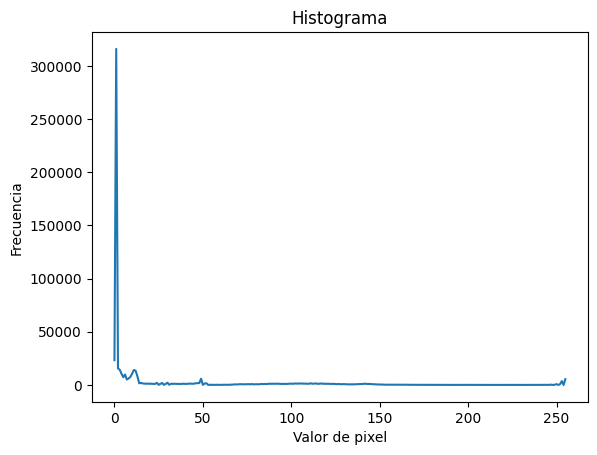

In [292]:
# b) Histograma en escala de grises
def histograma(X):
    (N,M) = X.shape
    n = 256
    h = np.zeros((256,))
    for i in range(N):
        for j in range(M):
            x = X[i,j]
            h[x] = h[x]+1
    plt.plot(range(n),h[0:n])
    plt.title('Histograma')
    plt.xlabel('Valor de pixel')
    plt.ylabel('Frecuencia')
    plt.show()
    
histograma(gris)



c-Encontrar las coordenadas del rectángulo que encierra el objeto segmentado. 

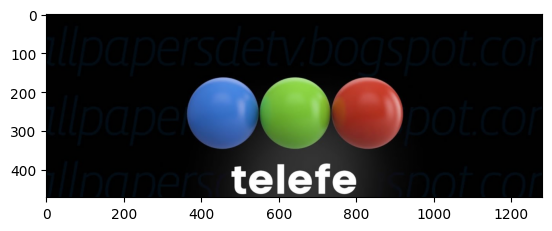

In [293]:
plt.imshow(imagen_rgb)
plt.show()

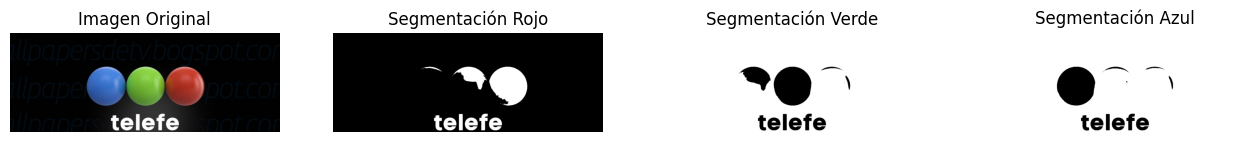

In [315]:
# Segmentación de la capa roja
seg_r = rojo > 130   # Filtro para el canal rojo
seg_v = verde < 120   # Filtro para el canal verde
seg_a = azul < 120   # Filtro para el canal azul

# Crear una figura con cuatro subgráficas (una para la imagen original y tres para las máscaras)
plt.figure(figsize=(16, 4))

# Mostrar la imagen original
plt.subplot(1, 4, 1)
plt.imshow(imagen_rgb)
plt.title('Imagen Original')
plt.axis('off')

# Mostrar la máscara roja
plt.subplot(1, 4, 2)
plt.imshow(seg_r * 255, cmap='gray')  # Multiplicamos por 255 para que se vea bien
plt.title('Segmentación Rojo')
plt.axis('off')

# Mostrar la máscara verde
plt.subplot(1, 4, 3)
plt.imshow(seg_v * 255, cmap='gray')  # Multiplicamos por 255 para que se vea bien
plt.title('Segmentación Verde')
plt.axis('off')

# Mostrar la máscara azul
plt.subplot(1, 4, 4)
plt.imshow(seg_a * 255, cmap='gray')  # Multiplicamos por 255 para que se vea bien
plt.title('Segmentación Azul')
plt.axis('off')

# Mostrar las cuatro imágenes
plt.show()


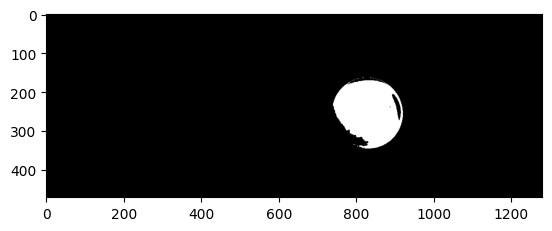

In [317]:
#Combina las máscaras seg_r  y seg_v 
seg_rv = np.logical_and(seg_r,seg_v)
#Ahora a esa combinación le agrega la condición seg_a (azul < 40).
seg = np.logical_and(seg_rv,seg_a)
#El resultado final (seg) es una máscara binaria que identifica los píxeles que tienen un color muy rojo (rojo alto, verde y azul bajos).
plt.imshow(seg * 255, cmap='gray')


¿Qué es una máscara binaria?
Una máscara binaria es una imagen en blanco y negro donde cada píxel solo puede tener dos valores:

1 (o True): significa que el píxel pertenece a la zona de interés (por ejemplo, una flor roja, un objeto, una persona, etc.).

0 (o False): significa que el píxel no pertenece a esa zona.

En imágenes, a veces se multiplica por 255 para mostrarla visualmente como:

255 (blanco)

0 (negro)



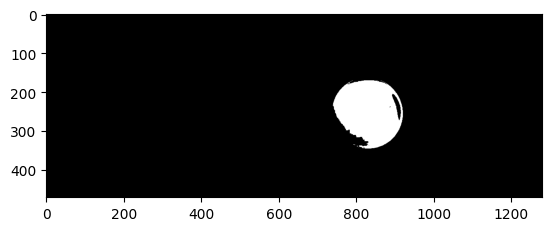

In [318]:
(N,M) = seg.shape
limpia = seg.copy()
for i in range(N):
    s = np.sum(seg[i,:])
    if s<10:
        limpia[i,:] = 0
plt.imshow(limpia * 255, cmap='gray')

In [319]:
# Búsqueda de coordenadas del rectángulo
i_min = 1000
i_max = 0
j_min = 1000
j_max = 0
for i in range(N):
    for j in range(M):
        if limpia[i,j]>0:
            if i<i_min: i_min = i
            if i>i_max: i_max = i
            if j<j_min: j_min = j
            if j>j_max: j_max = j

d-Dibujar los bordes del objeto segmentado en color rojo.

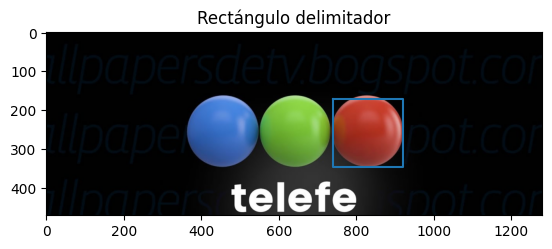

In [320]:
# Dibujo del rectángulo
y = [i_min,i_min,i_max,i_max,i_min]
x = [j_min,j_max,j_max,j_min,j_min]
plt.imshow(imagen_rgb)
plt.plot(x,y)
plt.title('Rectángulo delimitador')
plt.show()

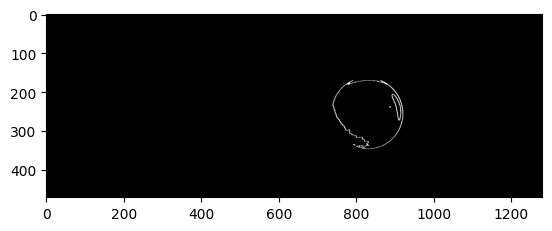

In [321]:
# Detección de bordes
borde = np.zeros((N,M),np.uint8)
# Bordes horizontales
for i in range(N):
    for j in range(1,M):
        if limpia[i,j]!=limpia[i,j-1]:
            borde[i,j] = 1
            borde[i,j-1] = 1
# Bordes verticales
for i in range(1,N):
    for j in range(M):
        if limpia[i-1,j]!=limpia[i,j]:
            borde[i,j] = 1
            borde[i,j-1] = 1
plt.imshow(borde * 255, cmap='gray')


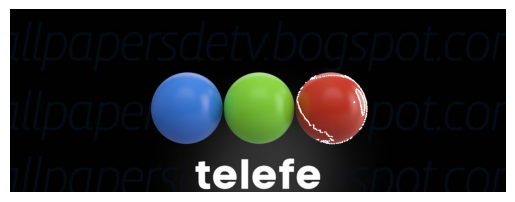

In [322]:
# Resultado final con bordes en blanco
img_final = imagen_rgb.copy()
ancho = 1  # radio del grosor (1 = 3x3)
for i in range(N):
    for j in range(M):
        if borde[i, j] == 1 and (i + j) % 4 == 0:  # condición para punteado
            for di in range(-ancho, ancho + 1):
                for dj in range(-ancho, ancho + 1):
                    ni, nj = i + di, j + dj
                    if 0 <= ni < N and 0 <= nj < M:
                        img_final[ni, nj, :] = [255, 255, 255]  # blanco

plt.imshow(img_final)
plt.axis('off')
plt.show()
